In [104]:
import keras
import skimage.io
import skimage.transform
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.layers import MaxPooling2D, Conv2D
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Model, Sequential
from keras.layers import Dense, Activation
import keras.backend as K
K.clear_session()


In [105]:
#prepare figures for this lab
import os.path
import warnings
warnings.filterwarnings("ignore")
nrow = 64
ncol = 64
dt=['train','test']
dataset=['George_W_Bush','Colin_Powell']

for ds in dataset:
    i=1
    while i< 181:
        fn= './{0:s}/{0:s}_{1:04d}.jpg'.format(ds, i)
        e=os.path.isfile(fn)    
        if not e:
            break
        img=skimage.io.imread(fn)   
        im= skimage.transform.resize(img,(nrow,ncol),mode='constant')
        fname= './project/{0:s}/{1:s}/{1:s}_{2:04d}.jpg'.format(dt[0], ds, i)            
        skimage.io.imsave(fname, im)
        if(i%50==0):
            print(i)
        i=1+i

for ds in dataset:
    i=181
    while i <221:
        fn= './{0:s}/{0:s}_{1:04d}.jpg'.format(ds, i)
        e=os.path.isfile(fn)
        if not e:
            break
        img=skimage.io.imread(fn)   
        im= skimage.transform.resize(img,(nrow,ncol),mode='constant')
        fname= './project/{0:s}/{1:s}/{1:s}_{2:04d}.jpg'.format(dt[1], ds, i)
        skimage.io.imsave(fname, im)
        i=i+1
        if(i%50==0):
            print(i)
#for each class, 180 for train, 40 for test           

50
100
150
50
100
150
200
200


In [106]:
#Load the VGG16 network
input_shape = (64,64,3)
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
#Create a new model
model = Sequential()
for layer in base_model.layers:
    model.add(layer)
for layer in model.layers:
    layer.trainable = False
model.add(Flatten(name='flatten'))
model.add(Dense(256, activation='relu', name='fully-connected'))
model.add(Dropout(0.5,name='Dropout'))
model.add(Dense(1, activation='sigmoid', name='output'))
model.summary()
# try to use model in lab 8 to complete this lab

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [107]:
train_data_dir = './project/train'
batch_size=12
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
                        train_data_dir,
                        target_size=(nrow,ncol),
                        batch_size=batch_size,
                        class_mode='binary')


Found 360 images belonging to 2 classes.


In [108]:
test_data_dir = './project/test'
test_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_generator = test_datagen.flow_from_directory(
                        test_data_dir,
                        target_size=(nrow,ncol),
                        batch_size=batch_size,
                        class_mode='binary')

Found 120 images belonging to 2 classes.


In [109]:
# Display the image
def disp_image(im):
    if (len(im.shape) == 2):
        plt.imshow(im, cmap='gray')    
    else:
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)    
    plt.xticks([])
    plt.yticks([])

[ 1.  1.  0.  1.  1.  0.  0.  0.  0.  1.  1.  0.]


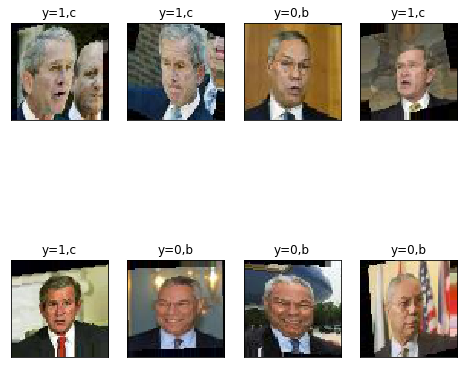

In [110]:
batch_size = 12
X, y=train_generator.next()
plt.figure(figsize=(8,8))
for i in range(8):
    plt.subplot(2,4,i+1)
    disp_image(X[i])
    if (y[i]==0):
        title = 'Colin_Powell'
    if (y[i]==1):
        title = 'George_W_Bush'
    plt.title(title)
plt.show()
# to show some figures

In [111]:
#finish the modle
opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])
steps_per_epoch =  train_generator.n // batch_size
validation_steps =  test_generator.n // batch_size

In [112]:
nepochs = 10
model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=nepochs,
    validation_data=test_generator,
    validation_steps=validation_steps,)

Epoch 1/10
30/30 [==============================] - 30s - loss: 0.7425 - acc: 0.6278 - val_loss: 0.4904 - val_acc: 0.7917
Epoch 2/10
30/30 [==============================] - 29s - loss: 0.5199 - acc: 0.7361 - val_loss: 0.3837 - val_acc: 0.8667
Epoch 3/10
30/30 [==============================] - 30s - loss: 0.4758 - acc: 0.7694 - val_loss: 0.3658 - val_acc: 0.8000
Epoch 4/10
30/30 [==============================] - 28s - loss: 0.4258 - acc: 0.8000 - val_loss: 0.3474 - val_acc: 0.8250
Epoch 5/10
30/30 [==============================] - 27s - loss: 0.4030 - acc: 0.8111 - val_loss: 0.3224 - val_acc: 0.8750
Epoch 6/10
30/30 [==============================] - 27s - loss: 0.3639 - acc: 0.8250 - val_loss: 0.3058 - val_acc: 0.8833
Epoch 7/10
30/30 [==============================] - 27s - loss: 0.3336 - acc: 0.8722 - val_loss: 0.2523 - val_acc: 0.8917
Epoch 8/10
30/30 [==============================] - 27s - loss: 0.2876 - acc: 0.8944 - val_loss: 0.2771 - val_acc: 0.8750
Epoch 9/10
30/30 [======

In [122]:
#input a new image to find who is it
import skimage.io
import face_recognition 
image=face_recognition.load_image_file("./3.jpg")
face_locations=face_recognition.face_locations(image)

In [132]:
#use face_recognition to find a human face
if (face_locations!=[]):
    print(face_locations)
    print("I found {} face(s) in this photograph.".format(len(face_locations)))
else:
    print("I cannot found a face(s) in this photograph.")

[(80, 175, 187, 67)]
I found 1 face(s) in this photograph.


A face is located at pixel location Top: 80, Left: 67, Bottom: 187, Right: 175


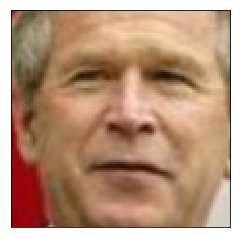

In [124]:
#show the face I found
from PIL import Image
face_image=[]
for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_imagei = image[top:bottom, left:right]
    face_image.append(face_imagei)
    disp_image(face_imagei)
    plt.show()

In [133]:
#find who is it 
batch_size = len(face_locations)
nchan=3
batch_shape = (batch_size,nrow,ncol,nchan)
x = np.zeros(batch_shape)
for i in range (len(face_locations)):
    im= skimage.transform.resize(face_image[i],(nrow,ncol),mode='constant')
    x[i,:,:,:]=im
y=model.predict(x)
print(y)
if (y<0.5):
    print('He is Colin_Powell')
if (y[i]>0.5):
    print('He is George_W_Bush')

[[ 0.99373865]]
He is George_W_Bush
